# Assignment 3 - Working with data

**Rationale**. In this assignment, you will practice reading/writing common dataset formats, execute conditional subsetting of data, merge data, and perform groupby summaries. 

Please comment your code for potential partial credit and to explain to me that you understand what you are doing. As always, feel free to add additional cells.

For any questions that requires a **text answer: make sure to type your answers in a text cell.**

(Make sure you've ) Save(d) the [datasets](https://drive.google.com/drive/folders/1wpphG0kRidK8W9DT79spBufId8jWCUvC?usp=sharing) in this folder to your Google Drive.

1. [Quebec Yelp Reviews](https://drive.google.com/file/d/1pmnps16-kI8VJaIizNXaOFyW0IZs_pZo/view?usp=sharing)
1.  [Quebec Business Info](https://drive.google.com/file/d/1eT72WiYI7xXT7wiNfo2w1uhxVC0qIage/view?usp=sharing)


In [6]:
# first, mount your GDrive
from google.colab import drive
drive.mount('drive')

Mounted at drive


# Problem 1 (2 points)

Read in the Quebec Yelp dataset from your Google Drive. Make sure that there are no "Unnamed" columns - if so, you've read in the index_col as a regular column. Make sure that the index corresponds to the row of the dataset using the `.reset_index` method. Convert "Date" column to a Pandas datetime format.

1. What is the observational unit of this dataset? (What does each row represent?)
1. How many rows are in this dataset? columns?
1. When was the earliest review written? latest?

## Problem 1 Answers (edit this cell)

1. Each row represents one **___buisness review______**.
1. There are **_____208166____** rows in the dataset
    1. There are **__9___** columns in the dataset excluding the index.
1. The first review is written on **___2007-01-02______**.
    1. The last review is written on **___2019-12-13____**.

In [7]:
# import any necessary libraries here

import pandas as pd

import os 
os.listdir('drive/')

['.shortcut-targets-by-id',
 '.file-revisions-by-id',
 'MyDrive',
 'Shareddrives',
 '.Trash-0']

In [ ]:
# First, list the folder containing your data
# fpath = 'path/to/your/data'
# os.listdir(fpath) 
# this should return a list containing the quebec_biz 
# and quebec_yelp_reviews datasets

os.listdir('drive/My Drive/Assignment_3/')

['quebec_biz.csv', 'quebec_yelp_reviews.csv']

In [119]:
# read in the reviews data
# pick a variable name for the reviews dataframe
# and set its value by reading in the appropriate dataset
# df = pd.read_csv(fpath + 'review_dataset_filename.csv', index_col = 0)
# you can call the dataframe something other than df
df = pd.read_csv('drive/My Drive/Assignment_3/quebec_yelp_reviews.csv', index_col = 0)





In [122]:
# preview the dataframe's first 5 rows using the .head() method
# what unit of observation does each row represent?
df.head()



,review_id,user_id,business_id,useful,funny,cool,text,date,stars
0,sybVjriZuCEH09zplkcXAw,qkJtn0Rtz_lKlTs5azBkng,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,AMAZING. Simply amazing. Believe all of the hy...,2013-12-29,5
1,uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,tOhRQqiupLyJdBJVQMGOEQ,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4
2,uRPUL-YSYuaJZLQp3Z0QlA,dSeYpzf0JkCeARr_CyCh7A,tOhRQqiupLyJdBJVQMGOEQ,1,2,0,"Montreal, what did you do in a previous life t...",2012-06-26,1
3,AGxEC3EtPW1vZH3v2DnPFA,ZhK2xIa4f73JZfua7IP8vA,tOhRQqiupLyJdBJVQMGOEQ,0,0,1,"St-Viateur is better, as bagels and as human b...",2016-02-24,3
4,7rBHa16cZexmPopeVrGKBw,ClJirlfCI0W0CfpYaWdfEw,tOhRQqiupLyJdBJVQMGOEQ,0,1,1,The bagels are good but first they had me writ...,2015-05-26,2


In [ ]:
# compute the shape of the dataset to return (rows, columns)
# use the .shape method
df.shape


(208166, 9)

In [ ]:
# take a look at the column names by accessing the dataframe's column attribute, 
# e.g. df.columns.values (but replace df with the name you picked)
df.columns.values



array(['review_id', 'user_id', 'business_id', 'useful', 'funny', 'cool',
       'text', 'date', 'stars'], dtype=object)

In [142]:
# find the date column above, convert the column to pandas datetime series
# using the pd.to_datetime(....) function
df['date'] = pd.to_datetime(df.date)
df.date.dtype




dtype('<M8[ns]')

In [168]:
# find the smallest date (use the .min method)
df.date.min()




Timestamp('2007-01-02 00:00:00')

In [170]:
# find the largest date (use the .max method)
df.date.max()




Timestamp('2019-12-13 00:00:00')

# Problem 2 (2 points)

Construct a **new** dataframe by selecting only the reviews written 1) on or after May 1st 2016 **and** 2) before June 1st 2019. **Save it** to an appropriate location on your Google Drive. (feel free to delete it later)

In [61]:
# pick a variable name and set it equal to the approriate subset of your dataframe
# (you can use the same variable name as the original dataframe)
# remember to select the dates with 2 conditions:
# >= '2016/5/1'
# < '2019/6/1'

#df = pd.read_csv('drive/My Drive/Assignment_3/quebec_yelp_reviews.csv', index_col = 0)
df2 = df[(pd.to_datetime(df['date']) >= pd.to_datetime('2016-5-1')) & (pd.to_datetime(df['date']) < pd.to_datetime('2019-6-1'))]
df2.date
#df2.to_csv('drive/My Drive/Assignment_3/')





1         2016-07-14
7         2016-09-19
10        2018-09-03
11        2017-05-26
13        2017-06-17
             ...    
208157    2019-01-23
208160    2018-02-08
208161    2018-01-14
208163    2017-08-19
208165    2019-05-05
Name: date, Length: 98372, dtype: object

In [54]:
# check the minimum and maximum dates of the resulting dataframe to confirm you've done this correctly
# min date
df2.date.min()




'2016-05-01'

In [55]:
# max date
df2.date.max()




'2018-12-31'

In [67]:
# save the dataset somewhere, give it a meaningful file name
df2.to_csv('drive/My Drive/Assignment_3/problem2Data.csv')




# Problem 3 (3 points)

**Use the dataset created in problem 2**

Create a new column `ym` that represents the year and month (drops date and time from dates).\
*Hint use `.dt.to_period` method from [notes](https://colab.research.google.com/drive/1RKy2g2aWOitE2rCQdZli8ERKdrtqU6Cl?usp=sharing).

Next, construct a line plot of the average usefulness votes (y-axis) by month between 2016/5 and 2019/5 `ym` (x-axis).\
*Hint - you need to do a groupby plot grouping on `ym` and compute the mean of star ratings.

### Use a text cell to answer:
1. What seasonal patterns do you see in the average helpfulness votes per review in Quebec? 

1. Come up with 2 potential explanations for the pattern(s) you've noticed.


## Problem 3 Answer (edit this cell)
1. It seems that as the season transitions from summer towards wither the ratings decrease. After winter towards the summer, the ratings increase.
1. During the winter the weather is more uncomfortable and harsh thus it is more difficult and expensive for buisnesses to regulate the tempurature in their establishments, thus leading to more unhappy customers.
Length of day relative to daylight has been shown to directly coralate to peoples happiness, therefore people are more likly to give positve reviews when happier in the summer and less positive reviews when less happy in the winter.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


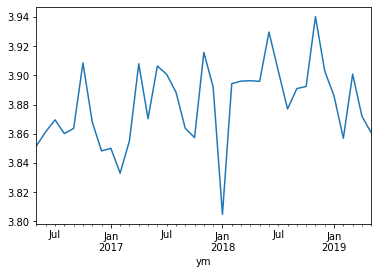

In [118]:
# create the plot using a groupby summary + .plot method
# refer to notes for examples
df2['ym'] = pd.to_datetime(df2.date).dt.to_period('M')
df2.groupby(['ym'])['stars'].mean().plot()



In [99]:
# check that you've created it correctly by finding the unique values of ym
# select the ym column and use the .unique() method
df2.ym.unique()





<PeriodArray>
['2016-07', '2016-09', '2018-09', '2017-05', '2017-06', '2017-07', '2016-05',
 '2018-08', '2017-08', '2017-10', '2016-10', '2018-07', '2016-08', '2016-06',
 '2017-04', '2017-01', '2018-06', '2018-02', '2018-05', '2017-09', '2018-04',
 '2018-03', '2016-12', '2016-11', '2017-02', '2017-11', '2017-03', '2018-01',
 '2018-10', '2017-12', '2019-01', '2018-12', '2018-11', '2019-04', '2019-03',
 '2019-02', '2019-05']
Length: 37, dtype: period[M]

In [80]:
# create 'ym' column
df2['ym'] = pd.to_datetime(df2.date).dt.to_period('M')
df2.ym




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1         2016-07
7         2016-09
10        2018-09
11        2017-05
13        2017-06
           ...   
208157    2019-01
208160    2018-02
208161    2018-01
208163    2017-08
208165    2019-05
Name: ym, Length: 98372, dtype: period[M]

# Probelm 4 (4 points)

Read in the Quebec **business info** dataset, be sure to use a different variable name for this dataframe.

## Part A questions (2 pts)
1. What is the observational unit of this dataset?
1. On what variable should you merge this (right dataframe) **into** the review data (left dataframe)? 

**Merge business data into the dataframe from Q2.**

Notice a column called "is_open" - if a business has shut down, this column will have a value of 0, otherwise it will have a value of 1.

Construct the line plot where: 
* x-axis is `ym` 
* y-axis is average star rating 
* there are 2 lines: 1. for currently open businesses and 2. closed businesses 
    * Make sure the 2 lines appear on the same figure.
    * You should compute avg. star rating using the `star` variable, not the `biz_star` variable.

## Part B questions (2 pts)
1. Any difference in patterns between these 2 groups of businesses?
1. Speculate on what reason(s) might cause the observed pattern(s).



## Problem 4 Answers (Edit this cell)

### Part A

1. Each row represents one **____buisness_____**
1. We should merge on **___buisnes_id______**

### Part B

1. (Describe any difference in patterns between currently open and shut down businesses)
The ratings of the closed buisness are on average lower and fluctuate more often between months.
1. 2 possible reasons are:
    1. Buisness that make less money will stretch resources to make ends meet making the quality of their service inconsistent, thus leading to a wider range of reviews.
    1. Bad buisnesses that cloase will have more bad service. Since people react more strongly to negative emotion than positive emotions, they will be more likely to leave the harshest lowest review. Thus, when the people who are more disproportionally likley leave a review experience bad service they will drop a low sqewing result.

In [113]:
# read in the business info file, call the dataframe biz, e.g. biz = pd.read_csv(...)
biz = pd.read_csv('drive/My Drive/Assignment_3/quebec_biz.csv', index_col = 0)



In [102]:
# Take a look at the first few rows to determine the observational unit
biz.head()
#the observational unit is buisness_id


,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours
2,XNoUzKckATkOD1hP6vghZg,Felinus,3554 Rue Notre-Dame O,Montreal,QC,H4C 1P4,45.479984,-73.580070,5.0,5,1,NaN,"Pets, Pet Services, Pet Groomers",NaN
31,pcaQDBM6r0PWTXfYZK6RdA,IGA Extra,8130 Boulevard Champlain,Lasalle,QC,H8P 1B4,45.425645,-73.611934,3.0,6,1,"{'BusinessParking': ""{'garage': False, 'street...","Food, Grocery","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
43,LoRef3ChgZKbxUio-sHgQg,Amir,5252 Rue Jean Talon O,Montréal,QC,H4P 2A7,45.494870,-73.651904,3.0,18,1,"{'RestaurantsAttire': ""u'casual'"", 'Restaurant...","Restaurants, Lebanese, Middle Eastern",NaN
45,_xOeoXfPUQTNlUAhXl32ug,Starbucks,150 Boulevard Crémazie E,Montréal,QC,H2P 1E2,45.542993,-73.640218,3.5,4,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Coffee & Tea, Food","{'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'..."
57,3BfGGIJn8lxvu1k3ZZnL1w,Théâtre Corona,2490 Rue Notre-Dame O,Montréal,QC,H3J 1N5,45.482777,-73.575006,4.0,18,1,"{'OutdoorSeating': 'False', 'RestaurantsPriceR...","Nightlife, Arts & Entertainment, Performing Ar...",NaN


In [108]:
# merge the 2 datasets
mergedDF = biz.merge(df2, how = 'right', on = 'business_id')
mergedDF


24


,business_id,name,address,city,state,postal_code,latitude,longitude,biz_stars,review_count,is_open,attributes,categories,hours,review_id,user_id,useful,funny,cool,text,date,stars,ym
0,tOhRQqiupLyJdBJVQMGOEQ,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",uZ66BJLPMx6mJAY_6bi8vQ,kNL4SpfIdMC8GywGayDEOw,0,0,0,Montreal bagels were well worth the experience...,2016-07-14,4,2016-07
1,tOhRQqiupLyJdBJVQMGOEQ,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Sc0YoR19v2ZHqPjjReMdfQ,8VFNDokKKbpUgCrH6TF9fA,0,0,0,Cheap and delicous! I definently understand wh...,2016-09-19,4,2016-09
2,tOhRQqiupLyJdBJVQMGOEQ,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",uZnzhtYAXAO_4ICeWOq9_A,bemY1DWj0rOLIPUBRnfkjg,0,0,0,Coming from a NYCer... This place is an absolu...,2018-09-03,5,2018-09
3,tOhRQqiupLyJdBJVQMGOEQ,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",Vx19GFjr7lSltZGOvBY6-A,0_7UeN4U_D6Iw6tHm90tXg,1,2,0,Great bagel if purchased straight from the ove...,2017-05-26,4,2017-05
4,tOhRQqiupLyJdBJVQMGOEQ,Fairmount Bagel,74 Avenue Fairmount O,Montréal,QC,H2T 2M2,45.522908,-73.595277,4.0,645,1,"{'BusinessParking': ""{'garage': False, 'street...","Bakeries, Food, Bagels","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",bXJ2bQ815xuUTLgo2UXpww,YVaONBBT9lSJQwBPWCB0qQ,3,2,1,Location: Let me think.... oh yes - on Fairmou...,2017-06-17,4,2017-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98367,PxurErpS9W8ektd7xJLpCw,Le Géraldine,163 Rue Saint-Eustache,Saint-Eustache,QC,J7R 2L5,45.558630,-73.893474,5.0,3,1,"{'GoodForMeal': ""{'dessert': False, 'latenight...","Restaurants, French, Bistros",NaN,2CI3Pt3k_n1M1EaX76SeXQ,-tLuSq-gr-GMI8gRF3PcjQ,1,0,0,This restaurant's food and decor is so unique ...,2019-01-23,5,2019-01
98368,pGug1ewRESW_HL_z3uFEHQ,Déneigement Saint-Charles,4917 Boulevard Saint-Charles,Pierrefonds,QC,H9H 3E4,45.467739,-73.874365,1.0,3,1,{'ByAppointmentOnly': 'False'},"Decks & Railing, Landscaping, Gardeners, Local...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",zQlx0T9qLBEKmsA3VglUDA,KmSzHgFbD26Bh9rcY2I_qw,2,0,0,We have employed the fortitled company for the...,2018-02-08,1,2018-02
98369,pGug1ewRESW_HL_z3uFEHQ,Déneigement Saint-Charles,4917 Boulevard Saint-Charles,Pierrefonds,QC,H9H 3E4,45.467739,-73.874365,1.0,3,1,{'ByAppointmentOnly': 'False'},"Decks & Railing, Landscaping, Gardeners, Local...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",CNpc_rwGhK9JlcKl7DfpBw,4_1MOsAkv3Xwwlz8N0YXdg,5,0,0,I've been with st-charles for 8 years. The ser...,2018-01-14,1,2018-01
98370,IkGlkzMHzWfpgJZv6qmTPQ,Eggsquis,3280 Boulevard Taschereau,Greenfield Park,QC,J4V 2H6,45.494508,-73.482129,3.0,4,1,"{'RestaurantsGoodForGroups': 'True', 'GoodForM...","Restaurants, Breakfast & Brunch","{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",HbmEOCd2Mrv4iuzyCjkhdg,iu3YFvY06HzYrpzFQdFvIA,0,0,0,Je suis une cliente habituelle. J'ai toujours ...,2017-08-19,2,2017-08


In [112]:
# take a look at the columns of the resulting dataframe
# make sure it has all the columns from both the review and business datasets
print((len(biz.columns)+len(df2.columns)-1) == len(mergedDF.columns))



True


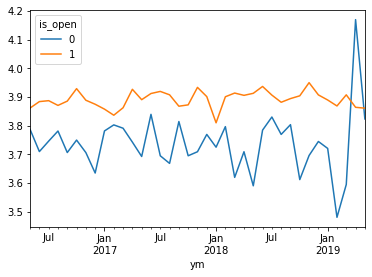

In [117]:
# make your plot, use groupby summary and unstack syntax 
# to construct plot, see examples from notes

mergedDF.groupby(['ym', 'is_open'])['stars'].mean().unstack("is_open").plot()

